### Notebook 4-2
# Regresión: reto opcional

## Se pide:

Se deberán probar todos los modelos posibles para cada uno de los siguientes problemas de negocio, industrializando en el paquete solamente el mejor de ellos para cada uno de los casos, con los mejores hiperparámetros y transformaciones previas encontradas.

<b>Regresión</b>:<br>
<b>Reto opcional</b>:<br>
Intentar predecir la ratio de likes/dislikes de cada vídeo.

## Importaciones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

## Carga de datos
Carga del fichero de datos generado al final del EDA.

In [2]:
df = pd.read_csv('..//data//processed//csv_eda.csv', index_col=0)

In [3]:
df.columns

Index(['title', 'channel_title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'category',
       'country', 'trending_date_year', 'trending_date_month',
       'publish_time_year', 'publish_time_month', 'ratio_viralidad',
       'ratio_interaccion_dia', 'publish_trending_days',
       'channel_title_encoded', 'tags_encoded', 'category_encoded',
       'country_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'publish_time_year_encoded',
       'trending_date_month_encoded', 'publish_time_month_encoded'],
      dtype='object')

Eliminamos la variable title, que no la vamos a usar.

In [4]:
df = df.drop('title', axis='columns')

In [5]:
df

,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,country,...,country_encoded,views_encoded,likes_encoded,dislikes_encoded,comment_count_encoded,ratio_interaccion_dia_encoded,trending_date_year_encoded,publish_time_year_encoded,trending_date_month_encoded,publish_time_month_encoded
0,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,Music,CA,...,0,2.195188,4.501606,1.803614,4.773962,4.336095,-1.823782,-1.758901,0.909091,0.909091
1,iDubbbzTV,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,Comedy,CA,...,0,-0.046118,0.536588,-0.020748,0.342217,0.455297,-1.823782,-1.758901,0.909091,0.909091
2,Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,Comedy,CA,...,0,0.256091,0.646234,0.138859,0.151795,0.536341,-1.823782,-1.758901,0.909091,0.909091
3,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,Entertainment,CA,...,0,0.103985,0.563307,-0.007590,0.518462,0.499084,-1.823782,-1.758901,0.909091,0.909091
4,Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,Music,CA,...,0,4.467192,9.591119,0.827083,3.171140,8.064948,-1.823782,-1.758901,0.909091,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,AaronsAnimals,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,Pets & Animals,US,...,9,0.047033,-0.002199,-0.033994,-0.065135,-0.007514,0.548311,0.568537,0.454545,0.363636
375938,zefrank1,[none],1064798,60008,382,3936,False,False,People & Blogs,US,...,9,-0.039156,0.129129,-0.077842,-0.014908,0.106453,0.548311,0.568537,0.454545,0.363636
375939,Brad Mondo,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,Entertainment,US,...,9,-0.038926,0.057358,-0.049426,-0.012709,0.048701,0.548311,0.568537,0.454545,0.363636
375940,How It Should Have Ended,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,Film & Animation,US,...,9,0.598922,0.928280,0.029875,0.344494,0.851151,0.548311,0.568537,0.454545,0.363636


# Crear un algoritmo de regresión que prediga la ratio likes/dislikes del vídeo.

Vamos a crear una nueva variable que será nuestra variable objetivo, ratio_likes_dislikes, y pasaremos a estudiar esta nueva variable.

### Crear la variable objetivo

Tenemos más de 9.000 registros con dislikes a cero, lo que haría que calcular la ratio diera error.

In [6]:
df[df['dislikes'].apply(lambda x: x==0)].shape

(9062, 30)

Considero que estos 9.000 registros (un 2,5% del total) no van a poder aportar información al estudio del ratio, por lo que los elimino.

In [7]:
df = df[df['dislikes'].apply(lambda x: x!=0)].copy()

df[df['dislikes'].apply(lambda x: x==0)].shape

(0, 30)

Creamos la nueva variable

In [8]:
df['ratio_likes_dislikes'] = df.apply(lambda row: row['likes'] / row['dislikes'], axis=1)

df[['likes', 'dislikes', 'ratio_likes_dislikes']]

,likes,dislikes,ratio_likes_dislikes
0,787425,43420,18.135076
1,127794,1688,75.707346
2,146035,5339,27.352500
3,132239,1989,66.485168
4,1634130,21082,77.513044
...,...,...,...
375937,38160,1385,27.552347
375938,60008,382,157.089005
375939,48068,1032,46.577519
375940,192957,2846,67.799368


### Estudiar la variable objetivo

Variable numérica continua con muchos valores extremos, todos válidos. 67,3% de valores únicos.

In [9]:
df[['ratio_likes_dislikes']].describe()

,ratio_likes_dislikes
count,353221.000000
mean,40.464076
std,68.571385
min,0.000000
25%,8.715909
50%,21.756757
75%,48.708333
max,11688.000000


In [10]:
df[['ratio_likes_dislikes']].nunique()

ratio_likes_dislikes    237853
dtype: int64

In [11]:
df['ratio_likes_dislikes'].value_counts(normalize=True)

ratio_likes_dislikes
4.000000     0.000801
7.000000     0.000790
6.000000     0.000725
9.000000     0.000702
3.000000     0.000665
               ...   
33.330798    0.000003
23.398034    0.000003
35.924282    0.000003
23.675934    0.000003
1.676616     0.000003
Name: proportion, Length: 237853, dtype: float64

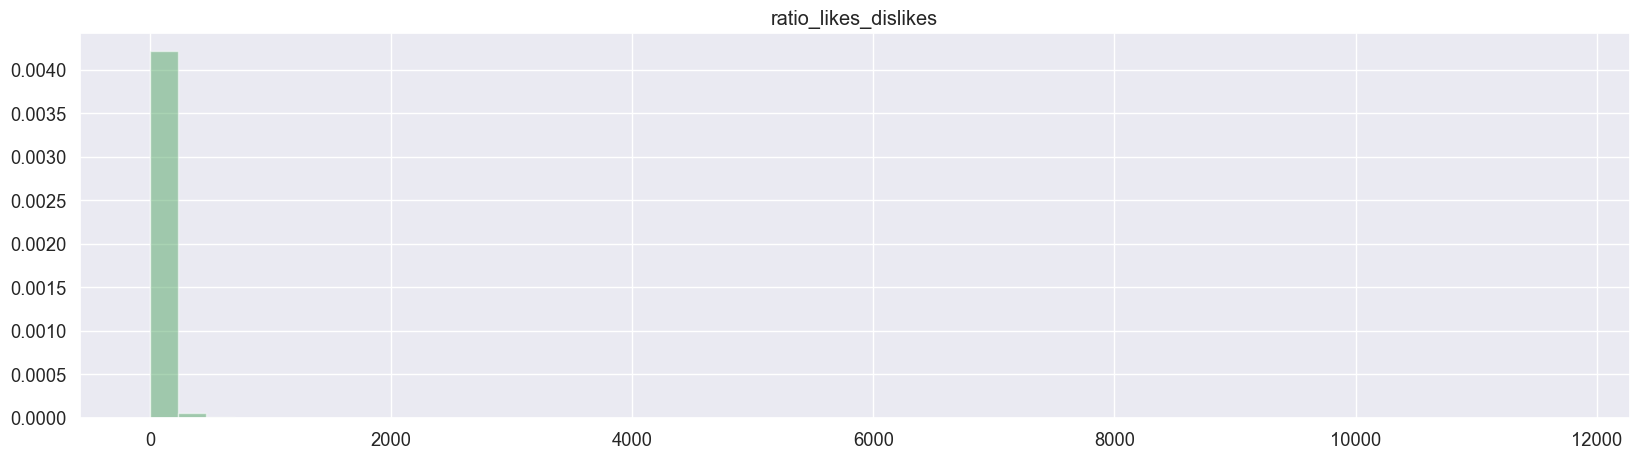

In [12]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

plt.hist(x=df['ratio_likes_dislikes'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('ratio_likes_dislikes')
plt.show()

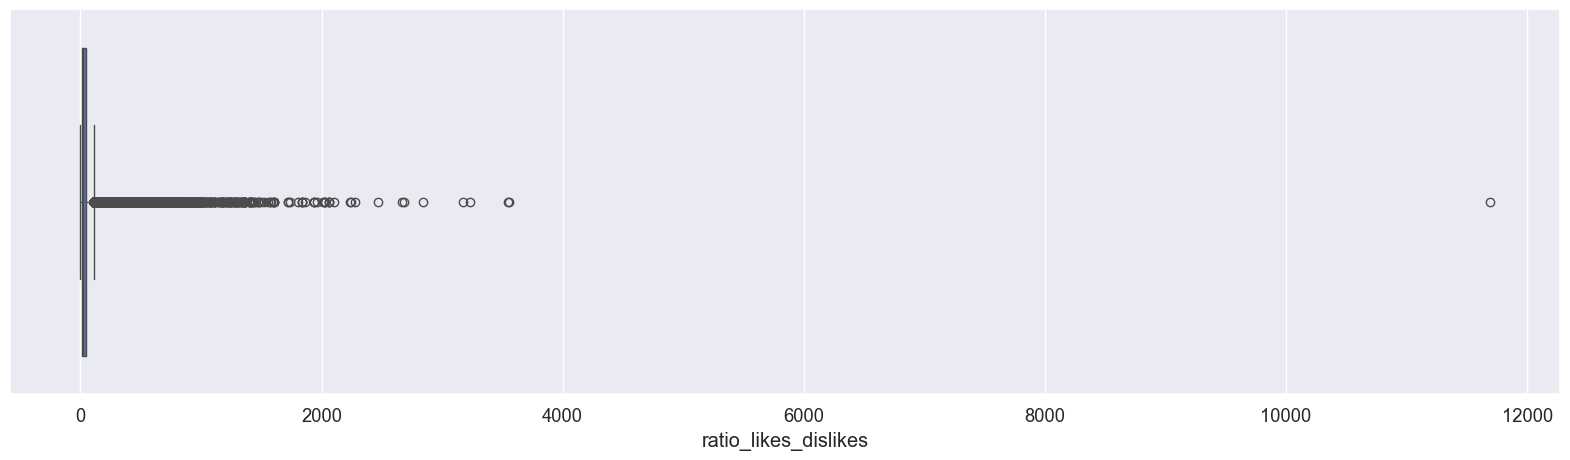

In [13]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

sns.boxplot(x=df['ratio_likes_dislikes'])
plt.show()

# Preprocesamiento de datos

No vamos a hacer el estudio de la relación entre las variables y pasamos directamente a preparar el dataset para aplicar los algoritmos de Machine Learning.

In [14]:
df.columns

Index(['channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'category', 'country',
       'trending_date_year', 'trending_date_month', 'publish_time_year',
       'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia',
       'publish_trending_days', 'channel_title_encoded', 'tags_encoded',
       'category_encoded', 'country_encoded', 'views_encoded', 'likes_encoded',
       'dislikes_encoded', 'comment_count_encoded',
       'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',
       'publish_time_year_encoded', 'trending_date_month_encoded',
       'publish_time_month_encoded', 'ratio_likes_dislikes'],
      dtype='object')

### Escalado de la variable objetivo

Todas las variables del dataframe están codificadas y escaladas en el EDA, por lo que aquí sólo hay que aplicar escalado a la nueva variable ratio_likes_dislikes.<br>
Aplicamos Standard Scaler porque tiene muchos valores extremos.

In [15]:
scaler_dict = {}

In [16]:
model_ratio_ld = StandardScaler().fit(df['ratio_likes_dislikes'].to_numpy().reshape(-1, 1))
df['ratio_likes_dislikes_encoded'] = model_ratio_ld.transform(df['ratio_likes_dislikes'].to_numpy().reshape(-1, 1))
scaler_dict['ratio_likes_dislikes'] = StandardScaler()

df[['ratio_likes_dislikes', 'ratio_likes_dislikes_encoded']].head()

,ratio_likes_dislikes,ratio_likes_dislikes_encoded
0,18.135076,-0.325632
1,75.707346,0.513965
2,27.352500,-0.191211
3,66.485168,0.379475
4,77.513044,0.540299


### Variables de entrada y de salida

In [17]:
df.columns

Index(['channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'category', 'country',
       'trending_date_year', 'trending_date_month', 'publish_time_year',
       'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia',
       'publish_trending_days', 'channel_title_encoded', 'tags_encoded',
       'category_encoded', 'country_encoded', 'views_encoded', 'likes_encoded',
       'dislikes_encoded', 'comment_count_encoded',
       'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',
       'publish_time_year_encoded', 'trending_date_month_encoded',
       'publish_time_month_encoded', 'ratio_likes_dislikes',
       'ratio_likes_dislikes_encoded'],
      dtype='object')

Entre otras, eliminamos de las variables de entrada likes, likes_encoded, dislikes y dislikes_encoded.

In [18]:
X = df[['channel_title_encoded', 'tags_encoded', 'views_encoded', 'comment_count_encoded',\
        'comments_disabled', 'ratings_disabled', 'category_encoded', 'country_encoded', 'ratio_viralidad',\
        'ratio_interaccion_dia_encoded', 'publish_trending_days', 'trending_date_year_encoded',\
        'trending_date_month_encoded', 'publish_time_year_encoded', 'publish_time_month_encoded']]

X

,channel_title_encoded,tags_encoded,views_encoded,comment_count_encoded,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,publish_trending_days,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded
0,7408,15414,2.195188,4.773962,False,False,8,0,0.055758,4.336095,3,-1.823782,0.909091,-1.758901,0.909091
1,28209,87447,-0.046118,0.342217,False,False,1,0,0.140454,0.455297,0,-1.823782,0.909091,-1.758901,0.909091
2,20687,88781,0.256091,0.151795,False,False,1,0,0.049995,0.536341,1,-1.823782,0.909091,-1.758901,0.909091
3,29088,91178,0.103985,0.518462,False,False,3,0,0.072404,0.499084,1,-1.823782,0.909091,-1.758901,0.909091
4,7030,64232,4.467192,3.171140,False,False,8,0,0.051912,8.064948,4,-1.823782,0.909091,-1.758901,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,910,51299,0.047033,-0.065135,False,False,12,9,0.025037,-0.007514,26,0.548311,0.454545,0.568537,0.363636
375938,30196,51138,-0.039156,-0.014908,False,False,11,9,0.060411,0.106453,26,0.548311,0.454545,0.568537,0.363636
375939,3535,21958,-0.038926,-0.012709,False,False,3,9,0.049784,0.048701,26,0.548311,0.454545,0.568537,0.363636
375940,10426,8106,0.598922,0.344494,False,False,4,9,0.036901,0.851151,27,0.548311,0.454545,0.568537,0.363636


In [19]:
y = df[['ratio_likes_dislikes_encoded']].copy(deep=True)
y

,ratio_likes_dislikes_encoded
0,-0.325632
1,0.513965
2,-0.191211
3,0.379475
4,0.540299
...,...
375937,-0.188296
375938,1.700784
375939,0.089155
375940,0.398640


- <b>Mapa de correlaciones</b> de todas las variables implicadas

In [20]:
X_for_corr = X.copy()
X_for_corr['ratio_likes_dislikes'] = y

In [21]:
X_for_corr.columns

Index(['channel_title_encoded', 'tags_encoded', 'views_encoded',
       'comment_count_encoded', 'comments_disabled', 'ratings_disabled',
       'category_encoded', 'country_encoded', 'ratio_viralidad',
       'ratio_interaccion_dia_encoded', 'publish_trending_days',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded',
       'ratio_likes_dislikes'],
      dtype='object')

In [22]:
X_for_corr.head()

,channel_title_encoded,tags_encoded,views_encoded,comment_count_encoded,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,publish_trending_days,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,ratio_likes_dislikes
0,7408,15414,2.195188,4.773962,False,False,8,0,0.055758,4.336095,3,-1.823782,0.909091,-1.758901,0.909091,-0.325632
1,28209,87447,-0.046118,0.342217,False,False,1,0,0.140454,0.455297,0,-1.823782,0.909091,-1.758901,0.909091,0.513965
2,20687,88781,0.256091,0.151795,False,False,1,0,0.049995,0.536341,1,-1.823782,0.909091,-1.758901,0.909091,-0.191211
3,29088,91178,0.103985,0.518462,False,False,3,0,0.072404,0.499084,1,-1.823782,0.909091,-1.758901,0.909091,0.379475
4,7030,64232,4.467192,3.171140,False,False,8,0,0.051912,8.064948,4,-1.823782,0.909091,-1.758901,0.909091,0.540299


In [23]:
corr_matrix = X_for_corr.corr()

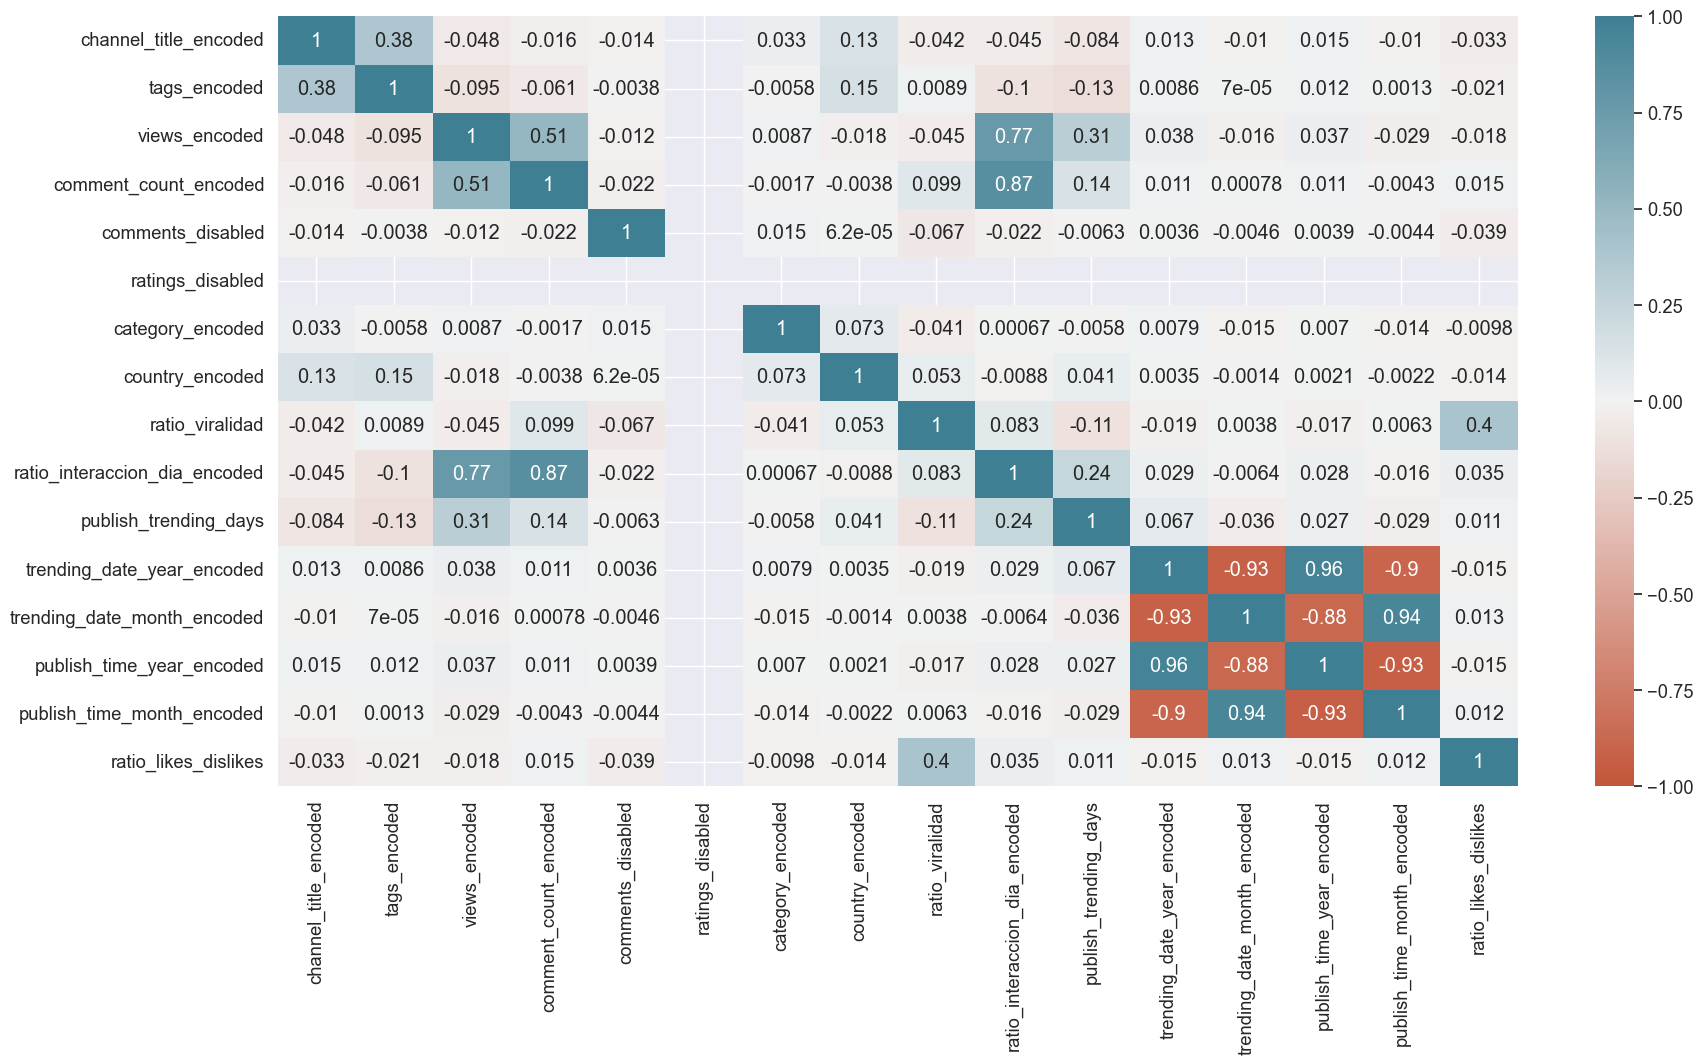

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(20, 220, n=256), vmin=-1, vmax=1)
plt.show()

Sólo tenemos correlación lineal media entre la variable objetivo, ratio_likes_dislikes, y ratio_viralidad. Con las demás variables independientes no hay correlación lineal.

- <b>Entrenamiento y validación</b>

In [25]:
X.columns

Index(['channel_title_encoded', 'tags_encoded', 'views_encoded',
       'comment_count_encoded', 'comments_disabled', 'ratings_disabled',
       'category_encoded', 'country_encoded', 'ratio_viralidad',
       'ratio_interaccion_dia_encoded', 'publish_trending_days',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded'],
      dtype='object')

In [26]:
X

,channel_title_encoded,tags_encoded,views_encoded,comment_count_encoded,comments_disabled,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,publish_trending_days,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded
0,7408,15414,2.195188,4.773962,False,False,8,0,0.055758,4.336095,3,-1.823782,0.909091,-1.758901,0.909091
1,28209,87447,-0.046118,0.342217,False,False,1,0,0.140454,0.455297,0,-1.823782,0.909091,-1.758901,0.909091
2,20687,88781,0.256091,0.151795,False,False,1,0,0.049995,0.536341,1,-1.823782,0.909091,-1.758901,0.909091
3,29088,91178,0.103985,0.518462,False,False,3,0,0.072404,0.499084,1,-1.823782,0.909091,-1.758901,0.909091
4,7030,64232,4.467192,3.171140,False,False,8,0,0.051912,8.064948,4,-1.823782,0.909091,-1.758901,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,910,51299,0.047033,-0.065135,False,False,12,9,0.025037,-0.007514,26,0.548311,0.454545,0.568537,0.363636
375938,30196,51138,-0.039156,-0.014908,False,False,11,9,0.060411,0.106453,26,0.548311,0.454545,0.568537,0.363636
375939,3535,21958,-0.038926,-0.012709,False,False,3,9,0.049784,0.048701,26,0.548311,0.454545,0.568537,0.363636
375940,10426,8106,0.598922,0.344494,False,False,4,9,0.036901,0.851151,27,0.548311,0.454545,0.568537,0.363636


In [27]:
y

,ratio_likes_dislikes_encoded
0,-0.325632
1,0.513965
2,-0.191211
3,0.379475
4,0.540299
...,...
375937,-0.188296
375938,1.700784
375939,0.089155
375940,0.398640


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresión Lineal

Sólo hay correlación lineal media de la variable objetivo con una de las variables independientes, y no hay correlación con las demás, por lo que no vamos a usar Regresión Lineal.

# MLP (Perceptrones Multicapa)

In [29]:
reg_MLP = MLPRegressor(random_state=42, verbose=1)

<b>Randomized Search</b>

In [30]:
hidden_layer_sizes_rs_MLP=[(100,), (100, 100)]   # (100,) / tamaño capas ocultas
activation_rs_MLP=['logistic', 'identity']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_rs_MLP=[0.0005, 0.001]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_rs_MLP=['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_rs_MLP=['constant', 'invscaling']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_rs_MLP=[100, 200]   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_rs_MLP=[True]   # True: baraja aleatoriamente los datos
early_stopping_rs_MLP=[True]
n_iter_no_change_rs_MLP=[50, 100]   # 10 / uso con early_stopping

random_grid_rs_MLP = {'hidden_layer_sizes': hidden_layer_sizes_rs_MLP, 'activation': activation_rs_MLP, 'alpha': alpha_rs_MLP, 'batch_size':batch_size_rs_MLP,\
                      'learning_rate': learning_rate_rs_MLP, 'max_iter': max_iter_rs_MLP, 'shuffle': shuffle_rs_MLP, 'early_stopping':early_stopping_rs_MLP, 'n_iter_no_change':n_iter_no_change_rs_MLP}

In [31]:
print('Iterando...')

MLP_rscv = RandomizedSearchCV(estimator=reg_MLP, param_distributions=random_grid_rs_MLP, scoring=None, n_iter=20, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')
MLP_rscv.fit(X_train, np.ravel(y_train))

best_params_MLP_rscv = MLP_rscv.best_params_
print(f"Best paramters: {best_params_MLP_rscv})")

Iterando...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Iteration 1, loss = 126474.11396226
Validation score: -3.856610
Iteration 2, loss = 1.66109062
Validation score: -2.197264
Iteration 3, loss = 1.14567707
Validation score: -0.977097
Iteration 4, loss = 1065.10129192
Validation score: -3.413070
Iteration 5, loss = 1436.56123704
Validation score: -254.712712
Iteration 6, loss = 1596.29705841
Validation score: -938.483341
Iteration 7, loss = 1755.11942564
Validation score: -11.892477
Iteration 8, loss = 1768.24327169
Validation score: -3.465606
Iteration 9, loss = 1489.91172423
Validation score: -6.802053
Iteration 10, loss = 2604.55792362
Validation score: -0.289428
Iteration 11, loss = 1208.94519768
Validation score: -1.699185
Iteration 12, loss = 1887.05102689
Validation score: -1.363410
Iteration 13, loss = 1076.74501389
Validation score: -234.932382
Iteration 14, loss = 1670.90726552
Validation score: -124957.957947
Iteration 15, loss = 2246.90373191
Validation

<b>Grid Search</b>

In [32]:
# a partir de los mejores parámetros de Randomized Search, escogemos parámetros para Grid Search y realizamos nuevas pruebas

hidden_layer_sizes_gs_MLP=[(100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100)]   # (100,) / tamaño capas ocultas
activation_gs_MLP=['relu', 'logistic']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_gs_MLP=[0.001]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_gs_MLP=['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_gs_MLP=['constant', 'invscaling']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_gs_MLP=range(190, 201, 100)   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_gs_MLP=[True]   # True: baraja aleatoriamente los datos
early_stopping_gs_MLP=[True]
n_iter_no_change_gs_MLP=range(40, 51, 10)   # 10 / uso con early_stopping

random_grid_gs_MLP = {'hidden_layer_sizes': hidden_layer_sizes_gs_MLP, 'activation': activation_gs_MLP, 'alpha': alpha_gs_MLP, 'batch_size':batch_size_gs_MLP,\
                      'learning_rate': learning_rate_gs_MLP, 'max_iter': max_iter_gs_MLP, 'shuffle': shuffle_gs_MLP, 'early_stopping': early_stopping_gs_MLP,\
                     'n_iter_no_change': n_iter_no_change_gs_MLP}

In [33]:
print('Iterando...')

MLP_gscv = GridSearchCV(estimator=reg_MLP, param_grid=random_grid_gs_MLP, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')
MLP_gscv.fit(X_train, np.ravel(y_train))

best_params_MLP_gscv = MLP_gscv.best_params_
print(f"Best parameters: {best_params_MLP_gscv}")

Iterando...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Iteration 1, loss = 6425.50181604
Validation score: -0.747460
Iteration 2, loss = 9.62785473
Validation score: -1169.021075
Iteration 3, loss = 123.19972027
Validation score: -2.382920
Iteration 4, loss = 76.60584079
Validation score: -1.146912
Iteration 5, loss = 50.49312368
Validation score: -41.196346
Iteration 6, loss = 28.06565148
Validation score: -0.229111
Iteration 7, loss = 13.21041586
Validation score: -34.805960
Iteration 8, loss = 8.54506196
Validation score: -1.887748
Iteration 9, loss = 612.84759463
Validation score: -0.084760
Iteration 10, loss = 0.58600502
Validation score: -0.038779
Iteration 11, loss = 0.57372494
Validation score: -0.151502
Iteration 12, loss = 0.64111014
Validation score: -0.264234
Iteration 13, loss = 1.04229325
Validation score: -2.185221
Iteration 14, loss = 1.21508601
Validation score: -0.537333
Iteration 15, loss = 1.08155125
Validation score: -1.307377
Iteration 16, loss =

### MLP

In [34]:
print('Iterando...')

reg_MLP = MLPRegressor(**best_params_MLP_gscv)
reg_MLP.fit(X_train, np.ravel(y_train))

print('Acabado')

Iterando...
Acabado


<b>Evaluación</b>

In [35]:
score_train = reg_MLP.score(X_train, y_train)
print('Score Train: {:.2%}'.format(score_train))
score_test = reg_MLP.score(X_test, y_test)
print('Score Test: {:.2%}'.format(score_test))

Score Train: 0.09%
Score Test: -0.00%


In [36]:
print('- Train:')

y_train_pred = reg_MLP.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_train, y_train_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Train:
Mean Absolute Error: 50.78%
Mean Squared Error: 104.91%
Root Mean Squared Error: 102.43%


In [37]:
print('- Test:')

y_test_pred = reg_MLP.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_test, y_test_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

- Test:
Mean Absolute Error: 50.55%
Mean Squared Error: 88.31%
Root Mean Squared Error: 93.97%


### Resultados de MLP

MLP ofrece muy malos resultados, score muy bajo y medidas de error muy altas.

# Random Forest

In [38]:
reg_rf = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)

### Randomized Search

In [39]:
n_estimators_rs_rf = [50, 100]   # 100: núm. árboles en el bosque
criterion_rs_rf = ['squared_error']   # squared_error; medición de la calidad de una división; squared_error/absolute_error (más lento)/friedman_mse/poisson
max_depth_rs_rf = [None]   # None: profundidad máxima; 'None': no limitado; int
min_samples_split_rs_rf = [2, 3]   # 2; núm. mínimo de muestras para dividir un nodo; int [2, inf), float (0.0, 1.0]
min_samples_leaf_rs_rf = [5, 10]   # 1; núm. mínimo de muestras en una hoja; int [1, inf); float (0.0, 1.0)
max_features_rs_rf = [0.2, 0.5]   # 1.0; núm. máximo de características a considerar al buscar la mejor difusión; valor numérico (int, float), 'sqrt', 'log2', None (max_features=n_features)
max_leaf_nodes_rs_rf = [None]   # None; núm. máximo de nodos hoja; 'None': sin limitación; rango [2, inf)
min_impurity_decrease_rs_rf = [0.0, 0.05]   # 0.0; nodo se divide si la reducción en la impureza es mayor que este valor; el algoritmo no dividirá nodos que no mejoren significativamente la pureza de las hojas
bootstrap_rs_rf = [True, False]   # True; False, se usa todo el conjunto de datos para construir cada árbol; True: se usan muestras de bootstrap
oob_score_rs_rf = [False]   # False; True, se usan muestras 'out of the bag' para estimar la precisión de generalización; error si está a True y bootstrap=False; OOB: estimación del rendimiento del modelo sin usar un conjunto de validación externo. Las muestras que no se usan para entrenar un árbol (muestras out of the bag) se usan para validar ese árbol.
ccp_alpha_rs_rf = [0.0, 0.05]   # 0.0; poda; cuanto mayor sea, más se poda
max_samples_rs_rf = [None]   # None; bootstrap, núm. muestras para entrenar cada árbol; error si tiene valor y bootstrap=False; None: todas; int: núm. muestras por árbol; float (0.0, 1.0]: porcentaje muestras por árbol

random_grid_rs_rf = {'n_estimators': n_estimators_rs_rf, 'criterion': criterion_rs_rf, 'max_depth': max_depth_rs_rf, 'min_samples_split': min_samples_split_rs_rf, \
                     'min_samples_leaf': min_samples_leaf_rs_rf, 'max_features': max_features_rs_rf, 'max_leaf_nodes': max_leaf_nodes_rs_rf, \
                     'min_impurity_decrease': min_impurity_decrease_rs_rf, 'bootstrap': bootstrap_rs_rf, 'oob_score': oob_score_rs_rf, 'ccp_alpha': ccp_alpha_rs_rf,\
                     'max_samples': max_samples_rs_rf}

In [40]:
print('Iterando...')

rf_rscv = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid_rs_rf, scoring=None, n_iter=25, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')
rf_rscv.fit(X_train, np.ravel(y_train))

best_params_rf_rscv = rf_rscv.best_params_
print(f"Best paramters: {best_params_rf_rscv})")

Iterando...
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s


Best paramters: {'oob_score': False, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 0.5, 'max_depth': None, 'criterion': 'squared_error', 'ccp_alpha': 0.0, 'bootstrap': False})


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.4s finished


### Grid Search

In [41]:
# a partir de los mejores parámetros de Randomized Search, escogemos parámetros para Grid Search

n_estimators_gs_rf = [100]   # 100: núm. árboles en el bosque
criterion_gs_rf = ['squared_error']   # squared_error; medición de la calidad de una división; squared_error/absolute_error (más lento)/friedman_mse/poisson
max_depth_gs_rf = [None]   # None: profundidad máxima; 'None': no limitado; int
min_samples_split_gs_rf = [2, 3]   # 2; núm. mínimo de muestras para dividir un nodo; int [2, inf), float (0.0, 1.0]
min_samples_leaf_gs_rf = list(range(1, 3))   # 1; núm. mínimo de muestras en una hoja; int [1, inf); float (0.0, 1.0)
max_features_gs_rf = list(np.arange(0.4, 0.7, 0.1))   # 1.0; núm. máximo de características a considerar al buscar la mejor difusión; valor numérico (int, float), 'sqrt', 'log2', None (max_features=n_features)
max_leaf_nodes_gs_rf = [None]   # None; núm. máximo de nodos hoja; 'None': sin limitación; rango [2, inf)
min_impurity_decrease_gs_rf = [0.0]   # 0.0; nodo se divide si la reducción en la impureza es mayor que este valor; el algoritmo no dividirá nodos que no mejoren significativamente la pureza de las hojas
bootstrap_gs_rf = [False]   # True; False, se usa todo el conjunto de datos para construir cada árbol; True: se usan muestras de bootstrap
oob_score_gs_rf = [False]   # False; True, se usan muestras 'out of the bag' para estimar la precisión de generalización; error si está a True y bootstrap=False; OOB: estimación del rendimiento del modelo sin usar un conjunto de validación externo. Las muestras que no se usan para entrenar un árbol (muestras out of the bag) se usan para validar ese árbol.
ccp_alpha_gs_rf = [0.0]   # 0.0; poda; cuanto mayor sea, más se poda
max_samples_gs_rf = [None]   # None; bootstrap, núm. muestras para entrenar cada árbol; error si tiene valor y bootstrap=False; None: todas; int: núm. muestras por árbol; float (0.0, 1.0]: porcentaje muestras por árbol

random_grid_gs_rf = {'n_estimators': n_estimators_gs_rf, 'criterion': criterion_gs_rf, 'max_depth': max_depth_gs_rf, 'min_samples_split':min_samples_split_gs_rf,\
                     'min_samples_leaf': min_samples_leaf_gs_rf, 'max_features': max_features_gs_rf, 'max_leaf_nodes': max_leaf_nodes_gs_rf, \
                     'min_impurity_decrease': min_impurity_decrease_gs_rf, 'bootstrap': bootstrap_gs_rf, 'oob_score': oob_score_gs_rf, \
                     'ccp_alpha': ccp_alpha_gs_rf, 'max_samples': max_samples_gs_rf}

In [42]:
print('Iterando...')

rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=random_grid_gs_rf, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')
rf_gscv.fit(X_train, np.ravel(y_train))

best_params_rf_gscv = rf_gscv.best_params_
print(f"Best parameters: {best_params_rf_gscv}")

Iterando...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.6s


Best parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.0s finished


## Random Forest

In [43]:
print('Iterando...')

reg_rf = RandomForestRegressor(**best_params_rf_gscv, n_jobs=-1, verbose=1)
reg_rf.fit(X_train, np.ravel(y_train))

print('Acabado')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Iterando...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s


Acabado


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.6s finished


<b>Evaluación</b>

In [44]:
score_train = reg_rf.score(X_train, y_train)
print('Score Train: {:.2%}'.format(score_train))
score_test = reg_rf.score(X_test, y_test)
print('Score Test: {:.2%}'.format(score_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Score Train: 100.00%


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s


Score Test: 61.73%


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


In [45]:
print('- Train:')

y_train_pred = reg_rf.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_train, y_train_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


- Train:


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s


Mean Absolute Error: 0.00%
Mean Squared Error: 0.00%
Root Mean Squared Error: 0.00%


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.9s finished


In [46]:
print('- Test:')

y_test_pred = reg_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: {:.2%}'.format(mae))

mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error: {:.2%}'.format(mse))

rmse = root_mean_squared_error(y_test, y_test_pred)
print('Root Mean Squared Error: {:.2%}'.format(rmse))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


- Test:


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s


Mean Absolute Error: 23.05%
Mean Squared Error: 33.80%
Root Mean Squared Error: 58.14%


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


<b>Resultado de Random Forest</b>

Obtenemos un score para el conjunto de entrenamiento del 100%, sin embargo para el conjunto de pruebas es sólo del 61%. Tenemos un probable sobreajuste.

<b>Sobreajuste</b>

Algunas de las formas de reducir el sobreajuste serían:

- aumentar el porcentaje del conjunto pruebas
- reducir max_depth
- reducir min_samples_split
- aumentar min_samples_leaf
- reducir n_estimators
- bootstrap = True

Vamos a partir del mejor resultado de las pruebas anteriores y a aplicar estas modificaciones.

Porcentaje del conjunto de pruebas

In [47]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)

Grid Search

In [48]:
max_depth_gs_rf_2 = [25, 30]   # None: profundidad máxima; 'None': no limitado; int -> reducir
min_samples_leaf_gs_rf_2 = [3, 4]   # 1; núm. mínimo de muestras en una hoja; int [1, inf); float (0.0, 1.0) -> aumentar -> no funciona aumentar, no sirve float
n_estimators_gs_rf_2 = [35, 40]   # 100: núm. árboles en el bosque -> reducir -> empeora un poco
min_samples_split_gs_rf_2 = [2]   # 2; núm. mínimo de muestras para dividir un nodo; int [2, inf), float (0.0, 1.0] -> reducir -> un desastre
max_features_gs_rf_2 = list(np.arange(0.4, 0.6, 0.1))   # 1.0; núm. máximo de características a considerar al buscar la mejor difusión; valor numérico (int, float), 'sqrt', 'log2', None (max_features=n_features)
criterion_gs_rf_2 = ['squared_error']   # squared_error; medición de la calidad de una división; squared_error/absolute_error (más lento)/friedman_mse/poisson
max_leaf_nodes_gs_rf_2 = [None]   # None; núm. máximo de nodos hoja; 'None': sin limitación; rango [2, inf)
min_impurity_decrease_gs_rf_2 = [0.0]   # 0.0; nodo se divide si la reducción en la impureza es mayor que este valor; el algoritmo no dividirá nodos que no mejoren significativamente la pureza de las hojas
bootstrap_gs_rf_2 = [False]   # True; False, se usa todo el conjunto de datos para construir cada árbol; True: se usan muestras de bootstrap
oob_score_gs_rf_2 = [False]   # False; True, se usan muestras 'out of the bag' para estimar la precisión de generalización; error si está a True y bootstrap=False; OOB: estimación del rendimiento del modelo sin usar un conjunto de validación externo. Las muestras que no se usan para entrenar un árbol (muestras out of the bag) se usan para validar ese árbol.
ccp_alpha_gs_rf_2 = [0.0]   # 0.0; poda; cuanto mayor sea, más se poda
max_samples_gs_rf_2 = [None]   # None; bootstrap, núm. muestras para entrenar cada árbol; error si tiene valor y bootstrap=False; None: todas; int: núm. muestras por árbol; float (0.0, 1.0]: porcentaje muestras por árbol

random_grid_gs_rf_2 = {'n_estimators': n_estimators_gs_rf_2, 'criterion': criterion_gs_rf_2, 'max_depth': max_depth_gs_rf_2, 'min_samples_split':min_samples_split_gs_rf_2,\
                     'min_samples_leaf': min_samples_leaf_gs_rf_2, 'max_features': max_features_gs_rf_2, 'max_leaf_nodes': max_leaf_nodes_gs_rf_2, \
                     'min_impurity_decrease': min_impurity_decrease_gs_rf_2, 'bootstrap': bootstrap_gs_rf_2, 'oob_score': oob_score_gs_rf_2, \
                     'ccp_alpha': ccp_alpha_gs_rf_2, 'max_samples': max_samples_gs_rf_2}

In [49]:
reg_rf_2 = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)

In [50]:
print('Iterando...')

rf_gscv_2 = GridSearchCV(estimator=reg_rf_2, param_grid=random_grid_gs_rf_2, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')
rf_gscv_2.fit(X_train_2, np.ravel(y_train_2))

best_params_rf_gscv_2 = rf_gscv_2.best_params_
print(f"Best parameters: {best_params_rf_gscv_2}")

Iterando...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Best parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 30, 'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 40, 'oob_score': False}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.8s finished


Random Forest

In [51]:
print('Iterando...')

reg_rf_2 = RandomForestRegressor(**best_params_rf_gscv_2, n_jobs=-1, verbose=1)
reg_rf_2.fit(X_train_2, np.ravel(y_train_2))

print('Acabado')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Iterando...
Acabado


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.7s finished


Evaluación

In [52]:
score_train_2 = reg_rf_2.score(X_train_2, y_train_2)
print('Score Train: {:.2%}'.format(score_train_2))
score_test_2 = reg_rf_2.score(X_test_2, y_test_2)
print('Score Test: {:.2%}'.format(score_test_2))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Score Train: 86.04%
Score Test: 58.63%


[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.4s finished


In [53]:
print('- Train:')

y_train_pred_2 = reg_rf_2.predict(X_train_2)

mae_2 = mean_absolute_error(y_train_2, y_train_pred_2)
print('Mean Absolute Error: {:.2%}'.format(mae_2))

mse_2 = mean_squared_error(y_train_2, y_train_pred_2)
print('Mean Squared Error: {:.2%}'.format(mse_2))

rmse_2 = root_mean_squared_error(y_train_2, y_train_pred_2)
print('Root Mean Squared Error: {:.2%}'.format(rmse_2))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


- Train:
Mean Absolute Error: 8.77%
Mean Squared Error: 14.66%
Root Mean Squared Error: 38.29%


[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.9s finished


In [54]:
print('- Test:')

y_test_pred_2 = reg_rf_2.predict(X_test_2)

mae_2 = mean_absolute_error(y_test_2, y_test_pred_2)
print('Mean Absolute Error: {:.2%}'.format(mae_2))

mse_2 = mean_squared_error(y_test_2, y_test_pred_2)
print('Mean Squared Error: {:.2%}'.format(mse_2))

rmse_2 = root_mean_squared_error(y_test_2, y_test_pred_2)
print('Root Mean Squared Error: {:.2%}'.format(rmse_2))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


- Test:
Mean Absolute Error: 24.08%
Mean Squared Error: 36.53%
Root Mean Squared Error: 60.44%


[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.3s finished


### Resultado de Random Forest

Tras las pruebas realizadas para evitar el sobreajuste, obtenemos un score para el conjunto de entrenamiento del 85% y para el conjunto de pruebas de casi el 59%.<br>
Por tanto, no se consigue superar el 62% de score del conjunto de pruebas previo a las modificaciones para evitar el posible sobreajuste.

# Conclusiones

Aunque los resultados de Random Forest no son muy buenos, son mucho mejores que los de MLP. Por tanto, vamos a industrializar Random Forest.